In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV

In [30]:
df = pd.read_csv('Ecommerce Customers')

In [31]:
df.shape

(500, 8)

In [32]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [34]:
categorical_col = df.select_dtypes(include='object').columns
#We assigned the categorical columns to the categorical col value.

In [35]:
numeric_col = df.select_dtypes(exclude='object').columns
#We assigned the numerical columns to the categorical col value.

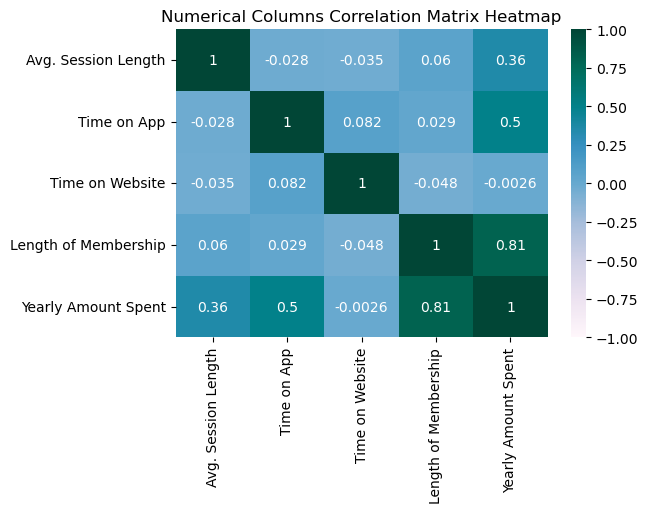

In [36]:
df_numeric = df[numeric_col]
corr_matrix_numeric = df_numeric.corr()

plt.figure(figsize=(6, 4)) 
sns.heatmap(corr_matrix_numeric, annot=True, cmap='PuBuGn', vmin=-1, vmax=1) 
plt.title('Numerical Columns Correlation Matrix Heatmap')
plt.show()

In [37]:
#We look at the diversity of our avatar values.
unique_avatars = df['Avatar'].unique()
print(unique_avatars)

['Violet' 'DarkGreen' 'Bisque' 'SaddleBrown' 'MediumAquaMarine'
 'FloralWhite' 'DarkSlateBlue' 'Aqua' 'Salmon' 'Brown' 'Tomato'
 'RoyalBlue' 'DarkBlue' 'Peru' 'PowderBlue' 'OliveDrab' 'Cyan'
 'LightSeaGreen' 'PeachPuff' 'Black' 'Olive' 'Silver' 'Wheat' 'Teal'
 'Linen' 'MediumSlateBlue' 'LemonChiffon' 'DarkOrchid' 'SeaGreen'
 'SteelBlue' 'DarkMagenta' 'DarkGoldenRod' 'DarkSeaGreen' 'Gainsboro'
 'HotPink' 'HoneyDew' 'WhiteSmoke' 'GhostWhite' 'Chocolate' 'Snow'
 'BurlyWood' 'Moccasin' 'BlueViolet' 'MediumBlue' 'GreenYellow'
 'SandyBrown' 'MediumVioletRed' 'DarkOliveGreen' 'DarkSalmon' 'DeepPink'
 'SkyBlue' 'Magenta' 'DarkTurquoise' 'SpringGreen' 'OrangeRed' 'LimeGreen'
 'LightGreen' 'LightYellow' 'MintCream' 'DimGray' 'Indigo' 'LightSalmon'
 'DeepSkyBlue' 'Turquoise' 'LightSteelBlue' 'Cornsilk' 'DarkKhaki'
 'FireBrick' 'SlateGray' 'Crimson' 'MidnightBlue' 'DarkCyan' 'OldLace'
 'Gray' 'LightPink' 'BlanchedAlmond' 'CadetBlue' 'PaleTurquoise'
 'Chartreuse' 'Khaki' 'MediumSpringGreen' 'Lime' 

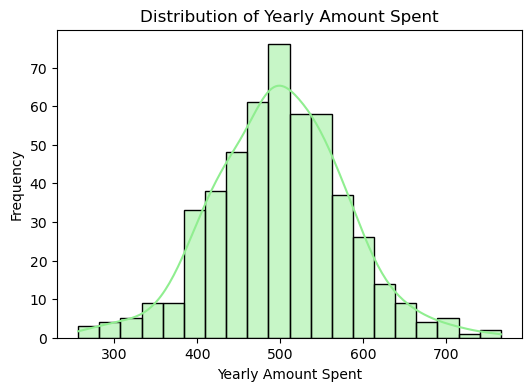

In [38]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Yearly Amount Spent'], kde=True, color='lightgreen')
plt.title('Distribution of Yearly Amount Spent')
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Frequency')
plt.show()

In [40]:
duplicated_mails = df['Email'].duplicated()

print("duplicated_mails:")
print(df[duplicated_mails])

duplicated_mails:
Empty DataFrame
Columns: [Email, Address, Avatar, Avg. Session Length, Time on App, Time on Website, Length of Membership, Yearly Amount Spent]
Index: []


In [41]:
df.drop(columns=['Email', 'Address', 'Avatar'], inplace=True)

In [42]:
X =  df.drop('Yearly Amount Spent' ,axis=1)
y = df['Yearly Amount Spent']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
#Using the trained linear regression model, 
#we predicted the car prices in the test dataset and assigned these predictions to the y_pred_lr variable.
r2_lr = r2_score(y_test, y_pred_lr)
#We calculate the R-squared score.
mse_lr = mean_squared_error(y_test, y_pred_lr)
#We calculate the Mean Squared Error (MSE).
rmse_lr = np.sqrt(mse_lr)
#We calculate the Root Mean Squared Error (RMSE).
print("Linear Regression Results:")
print(f"R-squared: {r2_lr:.4f}, MSE: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}\n")

Linear Regression Results:
R-squared: 0.9778, MSE: 109.86, RMSE: 10.48



In [45]:
#Ridge Regression
alpha_values = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 100.0]
#We select the best alpha value by performing cross validation on the list of alpha values.
ridge_cv = RidgeCV(alphas=alpha_values, cv=10)
ridge_cv.fit(X_train, y_train)

best_alpha_ridgecv = ridge_cv.alpha_
print(f"best alpha : {best_alpha_ridgecv}")
model_ridge_best = Ridge(alpha=best_alpha_ridgecv)
model_ridge_best.fit(X_train, y_train)
y_pred_ridge_best = model_ridge_best.predict(X_test)
r2_ridge_best = r2_score(y_test, y_pred_ridge_best)
mse_ridge_best = mean_squared_error(y_test, y_pred_ridge_best)
rmse_ridge_best = np.sqrt(mse_ridge_best)

print("\nRidge Regression Results (With Best Alpha):")
print(f"R-squared: {r2_ridge_best:.4f}, MSE: {mse_ridge_best:.2f}, RMSE: {rmse_ridge_best:.2f}\n")

#We obtained a value that approximates the standard linear regression of Ridge Regression.

best alpha : 0.5

Ridge Regression Results (With Best Alpha):
R-squared: 0.9779, MSE: 109.65, RMSE: 10.47



In [46]:
# Lasso Regression
alpha_values_lasso = np.logspace(-4, 0, 10)
#We select the best alpha value by performing cross validation on the list of alpha values.
lasso_cv = LassoCV(alphas=alpha_values_lasso, cv=5)
lasso_cv.fit(X_train, y_train)
best_alpha_lassocv = lasso_cv.alpha_
print(f"best alpha: {best_alpha_lassocv}")

model_lasso_best = Lasso(alpha=best_alpha_lassocv)
model_lasso_best.fit(X_train, y_train)
y_pred_lasso_best = model_lasso_best.predict(X_test)
r2_lasso_best = r2_score(y_test, y_pred_lasso_best)
mse_lasso_best = mean_squared_error(y_test, y_pred_lasso_best)
rmse_lasso_best = np.sqrt(mse_lasso_best)

print("\nLasso  Regression Results (With Best Alpha):")
print(f"R-squared: {r2_lasso_best:.4f}, MSE: {mse_lasso_best:.2f}, RMSE: {rmse_lasso_best:.2f}\n")

best alpha: 0.005994842503189409

Lasso  Regression Results (With Best Alpha):
R-squared: 0.9778, MSE: 109.86, RMSE: 10.48



In [47]:
# Polynomial  Regression
poly = PolynomialFeatures(degree=3, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
print("Polynomial   Regression Results:")
print(f"R-squared: {r2_poly:.4f}, MSE: {mse_poly:.2f}, RMSE: {rmse_poly:.2f}\n")

Polynomial   Regression Results:
R-squared: 0.9758, MSE: 119.77, RMSE: 10.94



In [48]:
#Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42) 
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Random Forest Regressor Results:")
print(f"R-squared: {r2_rf:.4f}, MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}\n")

Random Forest Regressor Results:
R-squared: 0.9336, MSE: 328.94, RMSE: 18.14



In [49]:
#Gradient Boosting Regressor
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42) 
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
print("Gradient Boosting Regressor Results:")
print(f"R-squared: {r2_gb:.4f}, MSE: {mse_gb:.2f}, RMSE: {rmse_gb:.2f}\n")

Gradient Boosting Regressor Results:
R-squared: 0.9563, MSE: 216.30, RMSE: 14.71



In [50]:
print("--- Model Performance Summary ---")
print(f"Linear Regression - R-squared: {r2_lr:.4f}, RMSE: {rmse_lr:.2f}")
print(f"Ridge Regression     - R-squared: {r2_ridge_best:.4f}, RMSE: {rmse_ridge_best:.2f}")
print(f"Lasso Regression       - R-squared: {r2_lasso_best:.4f}, RMSE: {rmse_lasso_best:.2f}")
print(f"Polynomial  Regression - R-squared: {r2_poly:.4f}, RMSE: {rmse_poly:.2f}")
print(f"Random Forest Regressor   - R-squared: {r2_rf:.4f}, RMSE: {rmse_rf:.2f}")
print(f"Gradient Boosting Regressor    - R-squared: {r2_gb:.4f}, RMSE: {rmse_gb:.2f}")

--- Model Performance Summary ---
Linear Regression - R-squared: 0.9778, RMSE: 10.48
Ridge Regression     - R-squared: 0.9779, RMSE: 10.47
Lasso Regression       - R-squared: 0.9778, RMSE: 10.48
Polynomial  Regression - R-squared: 0.9758, RMSE: 10.94
Random Forest Regressor   - R-squared: 0.9336, RMSE: 18.14
Gradient Boosting Regressor    - R-squared: 0.9563, RMSE: 14.71


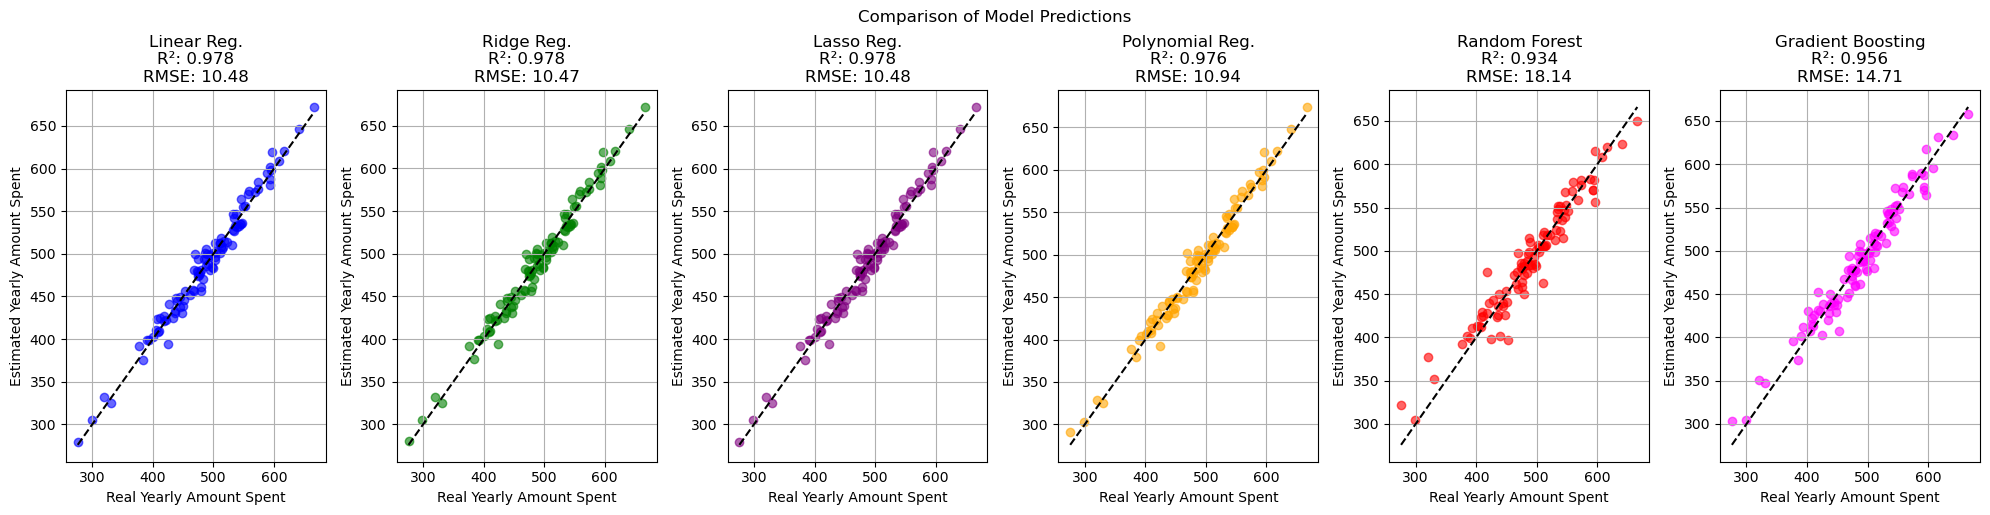

In [53]:
plt.figure(figsize=(20, 5))

# Linear Regression
plt.subplot(1, 6, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Linear Reg.\nR²: {r2_score(y_test, y_pred_lr):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}')
plt.xlabel('Real Yearly Amount Spent')
plt.ylabel('Estimated Yearly Amount Spent')
plt.grid(True)

# Ridge Regression
plt.subplot(1, 6, 2)
plt.scatter(y_test, y_pred_ridge_best, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Ridge Reg.\nR²: {r2_score(y_test, y_pred_ridge_best):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge_best)):.2f}')
plt.xlabel('Real Yearly Amount Spent')
plt.ylabel('Estimated Yearly Amount Spent')
plt.grid(True)

# Lasso Regression
plt.subplot(1, 6, 3)
plt.scatter(y_test, y_pred_lasso_best, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Lasso Reg.\nR²: {r2_score(y_test, y_pred_lasso_best):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso_best)):.2f}')
plt.xlabel('Real Yearly Amount Spent')
plt.ylabel('Estimated Yearly Amount Spent')
plt.grid(True)

# Polynomial Regression
plt.subplot(1, 6, 4)
plt.scatter(y_test, y_pred_poly, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Polynomial Reg.\nR²: {r2_score(y_test, y_pred_poly):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.2f}')
plt.xlabel('Real Yearly Amount Spent')
plt.ylabel('Estimated Yearly Amount Spent')
plt.grid(True)

# Random Forest Regressor
plt.subplot(1, 6, 5)
plt.scatter(y_test, y_pred_rf, color='red', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Random Forest\nR²: {r2_score(y_test, y_pred_rf):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}')
plt.xlabel('Real Yearly Amount Spent')
plt.ylabel('Estimated Yearly Amount Spent')
plt.grid(True)

# Gradient Boosting Regressor
plt.subplot(1, 6, 6)
plt.scatter(y_test, y_pred_gb, color='magenta', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Gradient Boosting\nR²: {r2_score(y_test, y_pred_gb):.3f}\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb)):.2f}')
plt.xlabel('Real Yearly Amount Spent')
plt.ylabel('Estimated Yearly Amount Spent')
plt.grid(True)

plt.tight_layout()
plt.suptitle('Comparison of Model Predictions', y=1.02)
plt.show()